### Scenario 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. 
Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

## What we need :

1. Find the top 5 investors who have invested maximum number of times.

2. In a startup, multiple investors might have invested. So consider each investor for that startup.

3. Ignore undisclosed investors.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
df.InvestorsName.fillna('', inplace = True)

investors = []

for i in df.InvestorsName:
    currInvestor = i.split(',')
    for j in currInvestor:
        investors.append(j.strip())
        
investors = np.array(investors)

In [5]:
investor_investments = {}

for i in investors:
    investor_investments[i] = investor_investments.get(i, 0) + 1
    
ans = sorted(investor_investments.items(), key = lambda x : x[1], reverse = True)
ans

[('Sequoia Capital', 64),
 ('Accel Partners', 53),
 ('', 46),
 ('Kalaari Capital', 44),
 ('SAIF Partners', 41),
 ('Indian Angel Network', 40),
 ('Blume Ventures', 39),
 ('Undisclosed Investors', 33),
 ('Ratan Tata', 30),
 ('Undisclosed investors', 28),
 ('Rajan Anandan', 25),
 ('Tiger Global', 25),
 ('Nexus Venture Partners', 24),
 ('Kae Capital', 22),
 ('IDG Ventures', 22),
 ('India Quotient', 21),
 ('500 Startups', 20),
 ('Anupam Mittal', 18),
 ('Matrix Partners', 18),
 ('Kunal Shah', 17),
 ('LetsVenture', 17),
 ('Mumbai Angels', 17),
 ('Omidyar Network', 16),
 ('Unitus Seed Fund', 16),
 ('Sequoia India', 15),
 ('Norwest Venture Partners', 15),
 ('IDG Ventures India', 15),
 ('Group of Angel Investors', 15),
 ('Bessemer Venture Partners', 14),
 ('TV Mohandas Pai', 14),
 ('Sandeep Tandon', 14),
 ('Tracxn Labs', 14),
 ('Helion Venture Partners', 14),
 ('ah! Ventures', 14),
 ('Tiger Global Management', 14),
 ('Jungle Ventures', 13),
 ('Girish Mathrubootham', 13),
 ('Anand Chandrasekaran'

### We have a null value in the top 5. So, we need to take first 6 excluding the null value

In [6]:
ans = ans[:2] + ans[3:6]
ans

[('Sequoia Capital', 64),
 ('Accel Partners', 53),
 ('Kalaari Capital', 44),
 ('SAIF Partners', 41),
 ('Indian Angel Network', 40)]

## Creating two new arrays. Investor and number_of_investments so that we can draw the graph

In [10]:
investors = []
investments = []
for i in ans:
    investors.append(i[0])
    investments.append(i[1])


## Creating bar graph 

In [11]:
# plt.bar(investor, investments, color = 'pink')
# plt.xlabel('Investors')
# plt.ylabel('Investments')
# plt.xticks(rotation = 40)
# plt.grid()
# plt.show()

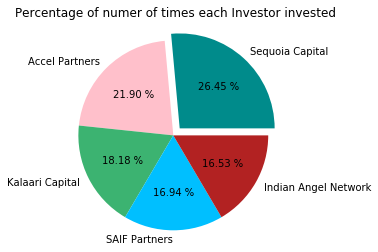

In [12]:
#Pie chart
plt.pie(investments, labels = investors, colors = ["darkcyan", "pink", "mediumseagreen", "deepskyblue", "firebrick"], explode = [0.1, 0,0,0,0], autopct = "%.2f %%")
plt.axis("equal")
plt.title("Percentage of numer of times each Investor invested")
plt.show()